In [1]:
import pandas as pd


In [2]:
#Load dataset
dataset = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
dataset.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


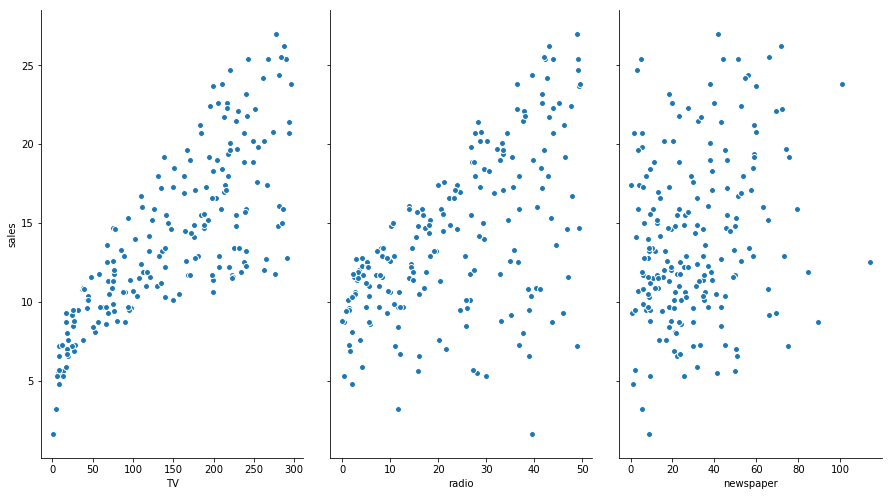

In [3]:
import seaborn as sns
% matplotlib inline
sns.pairplot(data=dataset, x_vars=['TV','radio','newspaper'],y_vars ='sales',size=7,aspect=0.6)

In [4]:
feature_cols = ['TV', 'radio','newspaper']
y=dataset['sales']
X=dataset[feature_cols]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=4)

In [5]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# print the intercept and coefficients
print("Linear Intercept :{0}".format(linreg.intercept_))
print("Linear Intercept :{0}".format(linreg.coef_))
list(zip(feature_cols, linreg.coef_))

Linear Intercept :3.0906443641251062
Linear Intercept :[ 0.04533392  0.17715767  0.00553852]


[('TV', 0.045333916933126897),
 ('radio', 0.17715766675060449),
 ('newspaper', 0.0055385204510282971)]

In [7]:
#Evaluvation Metrics 
y_pred = linreg.predict(X_test)
import numpy as np
from sklearn import metrics
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Square Error:1.4912326002041256


In [8]:
feature_cols = ['TV', 'radio']
y=dataset['sales']
X=dataset[feature_cols]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=4)
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Square Error:1.461303046743432


# Using K-fold cross validation

In [16]:
print(dataset.info())
rows,columns =dataset.shape
print("no of rows:{0}".format(rows))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 17.8 KB
None
no of rows:200


In [40]:
feature_cols = ['TV', 'radio','newspaper']
y=dataset['sales']
X=dataset[feature_cols]
linreg = LinearRegression()
# splitting a dataset of m observations into  n folds
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
folds=5
kf_dict = dict([("fold_%s" % i,[]) for i in range(1, folds+1)])
fold = 0
average_mse=0
kf = KFold(n_splits=folds, shuffle=False)
for train_index, test_index in kf.split(dataset):
    fold += 1
     
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
     
    kf_dict["fold_%s" % fold].append(test_mse)



    
for key,value in kf_dict.items():
    print("{0}--{1}".format(key,value))

    
import numpy as np
array =list(kf_dict.values())
#average_mse = np.mean(array)
np.mean(np.array(array))

fold_1--[3.1365399007617052]
fold_4--[5.4261550604294664]
fold_3--[1.5852250798740992]
fold_5--[2.7911451862763941]
fold_2--[2.4256677581593875]


3.0729465971002106